### House Price Prediction - Data Preprocessing and Feature Engineering

To build a housing price prediction system, we'll need to perform several steps, including data cleaning, feature engineering, data encoding etc. Let's start by loading the datasets and examining their structure to identify any necessary preprocessing steps.

In [1]:
import pandas as pd

In [5]:
train_df = pd.read_csv("train.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
test_df = pd.read_csv("test.csv")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Data Preprocessing
Data preprocessing involves several steps:

1. Handling missing values.
2. Encoding categorical variables.
3. Feature scaling (if necessary).

We'll start by handling missing values and encoding categorical variables.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [6]:
# Identifying columns with missing values
missing_values = train_df.isnull().sum()

In [7]:
# need to drop columns with more than 50% missing values
columns_to_drop = missing_values[missing_values > 0.5 * len(train_df)].index
train_df.drop(columns=columns_to_drop, axis=1, inplace=True)
test_df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [8]:
# Separate features and target variable
X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']

In [9]:
# Handling missing values and encoding categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [10]:
# Creating preprocessing pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [11]:
# Combining preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [12]:
# Applying preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)
X_test_preprocessed = preprocessor.transform(test_df)

# Splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [13]:
(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

((1168, 287), (292, 287), (1168,), (292,))

### Preprocessing Summary
The training dataset was preprocessed to handle missing values and encode categorical variables.
After preprocessing, we have:
1. 1168 samples in the training set.
2. 292 samples in the validation set.
3. 287 features (after one-hot encoding of categorical variables).

# Extras... 
down here are some extra work.. i.e, model training to see how it goes, it has nothing to do with Assignment 05

### Model Training
from here We'll train the model, lets start by training the linear regression model... and see how the prediction comes out

##### Full Process:
1. Train the model on the training data.
2. Evaluate the model on the validation set.
3. Make predictions on the test set.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [16]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Making predictions on the validation set
y_pred_val = model.predict(X_val)


In [19]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f'Root Mean Squared Error (RMSE) on validation set: {rmse}')

Root Mean Squared Error (RMSE) on validation set: 31128.314662037694


The Root Mean Squared Error (RMSE) of 31128.31 on the validation set indicates the average error between the predicted and actual sale prices in dollars. This is quite high... we may do some Feature Engineering or use more advanced machine learning models like Random forest. if there any outliers we may remove it so the we may get more precised predictions

In [20]:
test_predictions = model.predict(X_test_preprocessed)

In [21]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})

In [22]:
submission.head()

,Id,SalePrice
0,1461,104384.764063
1,1462,153685.257024
2,1463,168614.366465
3,1464,180794.715122
4,1465,226654.354569


In [23]:
# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
print('Predictions saved to submission.csv')

Predictions saved to submission.csv


### Let's do some Visualization...

1. Residual Plot: This shows the residuals (errors) vs. the predicted values.
2. Actual vs. Predicted Plot: This compares the actual sale prices with the predicted sale prices.
3. Distribution of Residuals: This shows the distribution of the residuals to check for normality.

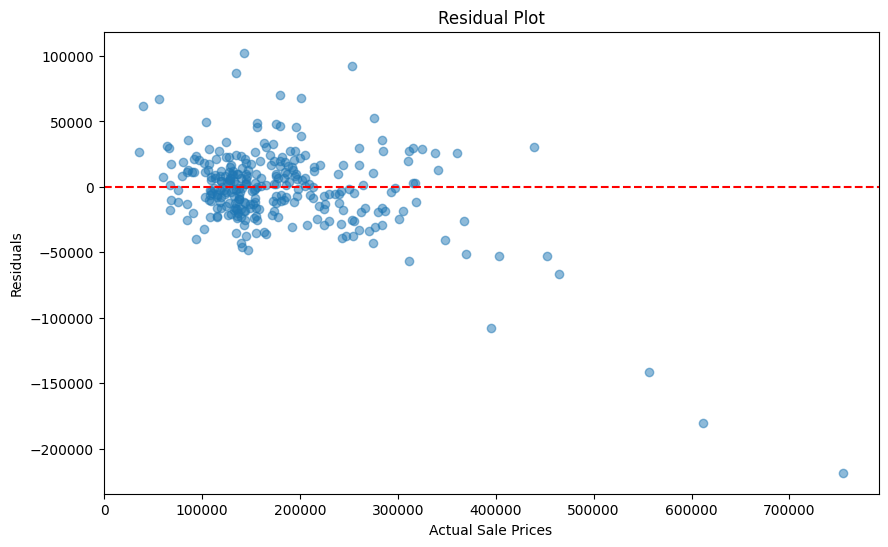

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_val - y_val, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

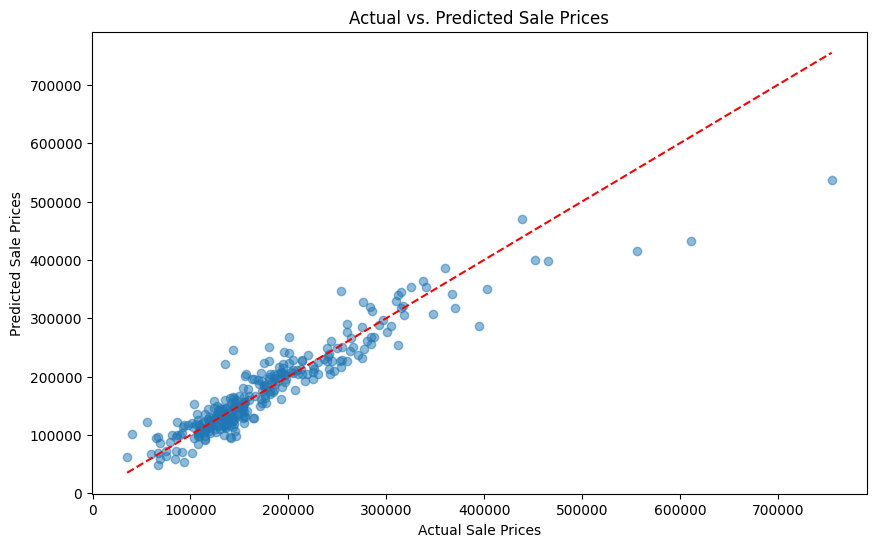

In [28]:
# actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='r', linestyle='--')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs. Predicted Sale Prices')
plt.show()


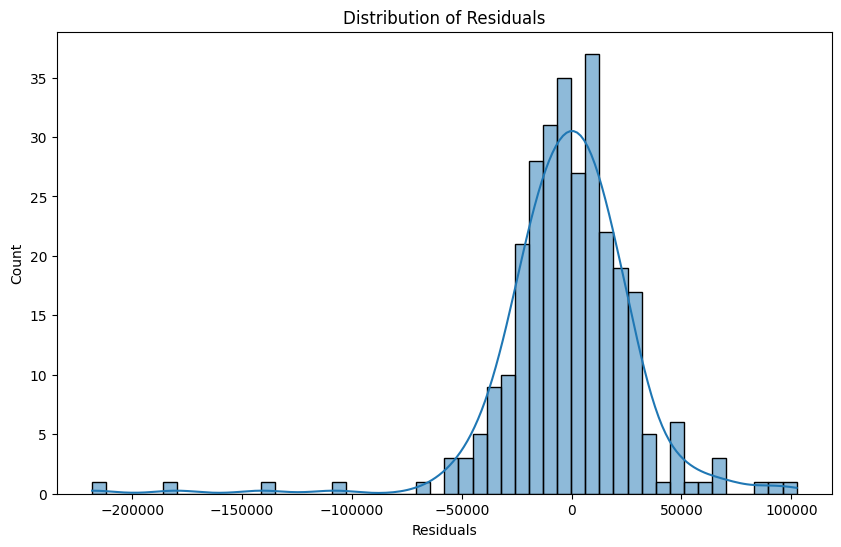

In [29]:
# distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_val - y_val, bins=50, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()